# BitCoin Price Prediction using Sentiment analysis on social media 


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install pyspark
!pip3 install vaderSentiment

     |████████████████████████████████| 281.4 MB 35 kB/s 
     |████████████████████████████████| 198 kB 47.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=312590c598a5a306e6f797a974a0fa73d871bd134ff4b49b0250446cf8c503fb
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
!pip3 install elephas

     |████████████████████████████████| 4.1 MB 10.1 MB/s 
     |████████████████████████████████| 281.3 MB 39 kB/s 
     |████████████████████████████████| 198 kB 38.7 MB/s 
     |████████████████████████████████| 462 kB 48.9 MB/s 
  Created wheel for elephas: filename=elephas-3.1.0-py3-none-any.whl size=26259 sha256=6e689981b2c8872bbba523d24d4d3d05e943621e842599b1428441cade3c0370
  Stored in directory: /root/.cache/pip/wheels/33/e4/e1/56dda8be927bb0e9971cd7ddf3fc1b17ce78db56268b1f867f
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805911 sha256=435bc23f14689fa50d83942574be944c3233525a5064340a861c8a2a939adeaf
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built elephas pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.3
    Uninstalling py4j-0.10.9.3:
      Successfully uninstalled py4j-0.10.9.3
  Attempting uninstall: h5py
    Found existing instal

In [ ]:
import re
import pandas as pd

## Loading tweets dataset

In [ ]:
twitterDf=pd.read_csv('data/tweetsfinal1.csv',error_bad_lines=False,engine = 'python',header = None) 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 845142: unexpected end of data


## Loading Bitcoin prices dataset 

In [ ]:
bitcoinDf=pd.read_csv('data/BitCoinPrice.csv',error_bad_lines=False,engine = 'python',header = None) 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Imputation: dropping empty rows
bitcoinDf = bitcoinDf.dropna() 

In [ ]:
bitcoinDf = bitcoinDf.rename(columns={0: "DateTime", 1: "Price"})
twitterDf = twitterDf.rename(columns={0: "DateTime", 1: "Tweet"})

In [ ]:
# Remove the column names from the first row
bitcoinDf = bitcoinDf.iloc[1: , :]

In [ ]:
bitcoinDf.head()

,DateTime,Price
1,10/30/17 0:00,6123.21
2,10/30/17 1:00,6131.35
3,10/30/17 2:00,6114.17
4,10/30/17 3:00,6153.11
5,10/30/17 4:00,6151.09


In [ ]:
twitterDf.head()

,DateTime,Tweet
0,Thu Nov 09 17:43:41 EST 2017,RT @Forbes: The Failure of SegWit2x Shows Bitc...
1,Thu Nov 09 17:43:40 EST 2017,RT @mindstatex: Lots of love from unknown mine...
2,Thu Nov 09 17:43:39 EST 2017,RT @FernandoHuamanX: Warning: Built-in Keylogg...
3,Thu Nov 09 17:43:39 EST 2017,RT @LevelNetwork: Join our telegram. All infor...
4,Thu Nov 09 17:43:39 EST 2017,"RT @realsheepwolf: $DIGAF: FLOAT=16M, THE ""ONL..."


## Pre-Processing Twitter dataframe

In [ ]:
twitterDf_noduplicates = twitterDf.drop_duplicates(subset=['Tweet'])
twitterDf_noduplicates = twitterDf_noduplicates.reset_index(drop=True)
twitterDf = twitterDf_noduplicates

In [ ]:
# Since we are using a sentiment analysis tool tokenization with tweetTokenizer isn't useful
# because emojis carry impactful sentiment data. 
twitterDf.Tweet = twitterDf.Tweet.apply(lambda x: re.sub(r'RT', '', x))

## Sentiment analysis using Vader Sentiment Analysis packages

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
arr = twitterDf.Tweet.apply(lambda x: analyser.polarity_scores(x)).array

In [ ]:
arrdf = pd.DataFrame(arr)
twitterDf = twitterDf.join(arrdf)

In [ ]:
def tw_time_format(stri):  
    dic = {'Nov':'11','Oct':'10'}
    ans = ''
    ans += stri[-4:]+'-'+ dic[stri[4:7]]+'-'+stri[8:19]
    return ans
twitterDf.DateTime = twitterDf.DateTime.apply(lambda x: tw_time_format(x))

In [ ]:
twitterDf['DateTime'] = pd.to_datetime(twitterDf['DateTime'].astype(str))

## Pre-Processing Bitcoin dataframe

In [ ]:
from datetime import datetime 
from dateutil import parser
def btc_Time_format(input_str): 
    input_str = re.sub(r'/17','', input_str)
    input_str = '2017-'+ input_str
    input_str = re.sub(r'/', '-', input_str)
    input_str += ':00'
    return input_str[:10]+""+input_str[10:]
bitcoinDf.DateTime = bitcoinDf.DateTime.apply(lambda x: btc_Time_format(x))

In [ ]:
bitcoinDf

,DateTime,Price
1,2017-10-30 0:00:00,6123.21
2,2017-10-30 1:00:00,6131.35
3,2017-10-30 2:00:00,6114.17
4,2017-10-30 3:00:00,6153.11
5,2017-10-30 4:00:00,6151.09
...,...,...
668,2017-11-26 19:00:00,9233.84
669,2017-11-26 20:00:00,9304.96
670,2017-11-26 21:00:00,9351.25
671,2017-11-26 22:00:00,9337.11


## Truncating timestamps to hours and then grouping them by hour

In [ ]:
# Truncate the time value to hours
twitterDf['DateTime'] = twitterDf['DateTime'].values.astype('<M8[h]')

In [ ]:
twitterDf

,DateTime,Tweet,neg,neu,pos,compound
0,2017-11-09 17:00:00,@Forbes: The Failure of SegWit2x Shows Bitcoi...,0.305,0.695,0.000,-0.6914
1,2017-11-09 17:00:00,@mindstatex: Lots of love from unknown miners...,0.000,0.607,0.393,0.8750
2,2017-11-09 17:00:00,@FernandoHuamanX: Warning: Built-in Keylogger...,0.138,0.862,0.000,-0.3400
3,2017-11-09 17:00:00,@LevelNetwork: Join our telegram. All informa...,0.000,0.855,0.145,0.2960
4,2017-11-09 17:00:00,"@realsheepwolf: $DIGAF: FLOAT=16M, THE ""ONLY""...",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
427845,2017-10-31 00:00:00,Current Prices:\n\n1 Waves = 3.46762$\n1 Waves...,0.000,1.000,0.000,0.0000
427846,2017-10-31 00:00:00,The price of bitcoin on @coinbase is now 6136....,0.000,1.000,0.000,0.0000
427847,2017-10-31 00:00:00,Bitcoin value: $6132.78,0.000,0.455,0.545,0.3400
427848,2017-10-31 00:00:00,Wall Street Hedge Funds Rush to Cryptocurrenci...,0.143,0.857,0.000,-0.2500


In [ ]:
# Calculate the sentiment score means over the hour periods
aggregateddf = twitterDf.groupby([twitterDf.DateTime]).agg({'neg': 'mean', 'neu': 'mean', 'pos': 'mean', 'compound': 'mean'})

## Joining twitter and bitcoin dataframes by DateTime

In [ ]:
bitcoinDf['DateTime'] = pd.to_datetime(bitcoinDf['DateTime'].astype(str))
aggregateddf = aggregateddf.reset_index()


In [ ]:
bitcoinDftrunc = bitcoinDf.iloc[:400 , :]
aggregateddf = aggregateddf.drop_duplicates()
results =pd.merge(
    aggregateddf,
    bitcoinDftrunc, 
    left_on='DateTime', right_on='DateTime')
results.head(50)

,DateTime,neg,neu,pos,compound,Price
0,2017-10-31 00:00:00,0.032437,0.890339,0.077232,0.101499,6142.46
1,2017-10-31 01:00:00,0.027915,0.895003,0.077087,0.111259,6139.47
2,2017-10-31 02:00:00,0.030808,0.889559,0.079633,0.113919,6128.2
3,2017-10-31 03:00:00,0.037267,0.888217,0.074520,0.099411,6130.72
4,2017-10-31 04:00:00,0.042299,0.874659,0.083050,0.092276,6143.92
5,2017-10-31 05:00:00,0.034170,0.873695,0.092135,0.137105,6158.76
6,2017-10-31 06:00:00,0.030624,0.892336,0.077040,0.112308,6105.9
7,2017-10-31 07:00:00,0.024451,0.901301,0.074248,0.104697,6094.36
8,2017-10-31 08:00:00,0.026641,0.898513,0.074843,0.112844,6125.13
9,2017-10-31 09:00:00,0.030787,0.897404,0.071810,0.099667,6165


In [ ]:
results.to_csv('SentimentScores.csv')

In [ ]:
resultscompound = results.reset_index()
resultscompound = results[['DateTime','compound','Price']]

In [ ]:
resultscompound = resultscompound.rename(columns={'compound': "SentimentScore"})
resultscompound

,DateTime,SentimentScore,Price
0,2017-10-31 00:00:00,0.101499,6142.46
1,2017-10-31 01:00:00,0.111259,6139.47
2,2017-10-31 02:00:00,0.113919,6128.2
3,2017-10-31 03:00:00,0.099411,6130.72
4,2017-10-31 04:00:00,0.092276,6143.92
...,...,...,...
229,2017-11-09 13:00:00,0.069841,7129.24
230,2017-11-09 14:00:00,0.077063,7228.23
231,2017-11-09 15:00:00,0.080775,7173.31
232,2017-11-09 16:00:00,0.090996,7165.1


In [ ]:
results.to_csv('SentimentScoreCompound.csv')

#LSTM Model

In [ ]:
import pandas as pd
import pyspark as spark
import warnings
from pyspark.sql.types import *
from pyspark.sql import SQLContext
from pyspark.sql.functions import col,udf,monotonically_increasing_id,unix_timestamp,round,avg
import re
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import pyspark as spark
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
sc = spark.SparkContext()
sql = spark.SQLContext(sc)
from pyspark.sql.types import *
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from elephas.utils.rdd_utils import to_simple_rdd

In [ ]:
df = pd.read_csv('SentimentScore.csv',header=None).iloc[1:, 1:]
df.columns = ['DateTime','Sentiment_score','Price']
df.Sentiment_score = df.Sentiment_score.astype('double')
df.Price = df.Price.astype('double')
df.DateTime = df.DateTime.astype('datetime64')

print(df.info())
df.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 1 to 233
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DateTime         233 non-null    datetime64[ns]
 1   Sentiment_score  233 non-null    float64       
 2   Price            233 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 5.6 KB
None


,DateTime,Sentiment_score,Price
1,2017-10-31 00:00:00,0.101499,6142.46
2,2017-10-31 02:00:00,0.113919,6128.20
3,2017-10-31 03:00:00,0.099411,6130.72
4,2017-10-31 04:00:00,0.092276,6143.92
5,2017-10-31 05:00:00,0.137105,6158.76
6,2017-10-31 06:00:00,0.112308,6105.90
7,2017-10-31 07:00:00,0.104697,6094.36
8,2017-10-31 08:00:00,0.112844,6125.13
9,2017-10-31 09:00:00,0.099667,6165.00
10,2017-10-31 10:00:00,0.071477,6170.77


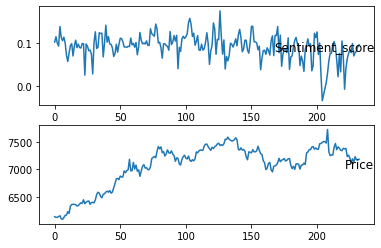

In [ ]:
values = df.values
# specify columns to plot
groups = [ 1,2]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [ ]:
df.set_index('DateTime',inplace=True)  
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df


,Price,Sentiment_score
DateTime,,
2017-10-31 00:00:00,6142.46,0.101499
2017-10-31 02:00:00,6128.20,0.113919
2017-10-31 03:00:00,6130.72,0.099411
2017-10-31 04:00:00,6143.92,0.092276
2017-10-31 05:00:00,6158.76,0.137105
...,...,...
2017-11-09 13:00:00,7129.24,0.069841
2017-11-09 14:00:00,7228.23,0.077063
2017-11-09 15:00:00,7173.31,0.080775


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    '''
    Converts the original dataframe to a format which contains
    lag shifted values of inputs which can be used as input
    to the LSTM
    '''
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
n_hours = 3  #no of time lags
n_features = 1 #no of features
n_obs = n_hours*n_features

In [ ]:
reframed = series_to_supervised(scaled, n_hours, 1)
reframed.head()

,var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
3,0.029552,0.652110,0.020791,0.712532,0.022339,0.641950,0.030449,0.607235
4,0.020791,0.712532,0.022339,0.641950,0.030449,0.607235,0.039567,0.825337
5,0.022339,0.641950,0.030449,0.607235,0.039567,0.825337,0.007090,0.704697
6,0.030449,0.607235,0.039567,0.825337,0.007090,0.704697,0.000000,0.667668
7,0.039567,0.825337,0.007090,0.704697,0.000000,0.667668,0.018905,0.707304


In [ ]:
reframed = reframed.drop(reframed.columns[-1], axis=1)
reframed.head()

,var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t)
3,0.029552,0.652110,0.020791,0.712532,0.022339,0.641950,0.030449
4,0.020791,0.712532,0.022339,0.641950,0.030449,0.607235,0.039567
5,0.022339,0.641950,0.030449,0.607235,0.039567,0.825337,0.007090
6,0.030449,0.607235,0.039567,0.825337,0.007090,0.704697,0.000000
7,0.039567,0.825337,0.007090,0.704697,0.000000,0.667668,0.018905


In [ ]:
values = reframed.values
n_train_hours = 170
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train.shape

(170, 7)

In [ ]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(170, 3, 1) (170,) (60, 3, 1) (60,)


In [ ]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history


Epoch 1/20
43/43 - 7s - loss: 0.4066 - val_loss: 0.4274 - 7s/epoch - 153ms/step
Epoch 2/20
43/43 - 0s - loss: 0.2303 - val_loss: 0.1997 - 268ms/epoch - 6ms/step
Epoch 3/20
43/43 - 0s - loss: 0.1265 - val_loss: 0.0655 - 245ms/epoch - 6ms/step
Epoch 4/20
43/43 - 0s - loss: 0.1392 - val_loss: 0.0651 - 295ms/epoch - 7ms/step
Epoch 5/20
43/43 - 0s - loss: 0.1331 - val_loss: 0.0646 - 225ms/epoch - 5ms/step
Epoch 6/20
43/43 - 0s - loss: 0.1272 - val_loss: 0.0640 - 231ms/epoch - 5ms/step
Epoch 7/20
43/43 - 0s - loss: 0.1221 - val_loss: 0.0640 - 191ms/epoch - 4ms/step
Epoch 8/20
43/43 - 0s - loss: 0.1184 - val_loss: 0.0632 - 304ms/epoch - 7ms/step
Epoch 9/20
43/43 - 0s - loss: 0.1130 - val_loss: 0.0628 - 263ms/epoch - 6ms/step
Epoch 10/20
43/43 - 0s - loss: 0.1091 - val_loss: 0.0624 - 256ms/epoch - 6ms/step
Epoch 11/20
43/43 - 0s - loss: 0.1047 - val_loss: 0.0632 - 288ms/epoch - 7ms/step
Epoch 12/20
43/43 - 0s - loss: 0.0992 - val_loss: 0.0622 - 330ms/epoch - 8ms/step
Epoch 13/20
43/43 - 0s - l

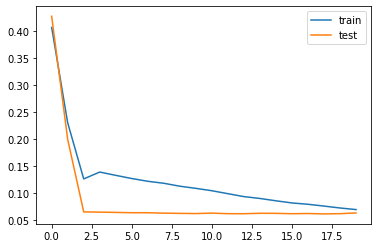

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours* n_features))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 152.236


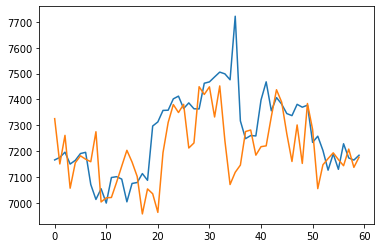

In [ ]:
plt.plot(inv_y)
plt.plot(inv_yhat)

In [ ]:
len(inv_yhat)

60

In [ ]:
plt.show()

In [ ]:
inv_y = np.insert(inv_y,0,7000)

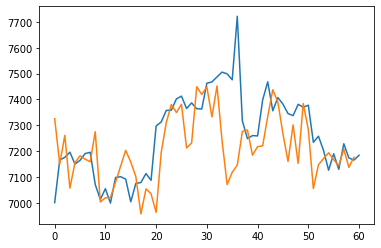

In [ ]:
plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()

## Multifeature Sentiment Analysis

In [ ]:
df1 = pd.read_csv('SentimentScores.csv',header=None).iloc[1:, 1:]
bitcoinDf.rename(columns={0: "DateTime", 1: "Price"})
df1.columns = ['DateTime','Negative','Neutral','Positive','Compound','Price']

df1.Negative = df1.Negative.astype('double')
df1.Neutral = df1.Neutral.astype('double')
df1.Positive = df1.Positive.astype('double')
df1.Compound = df1.Compound.astype('double')
df1.Price = df1.Price.astype('double')
df1.DateTime = df1.DateTime.astype('datetime64')
df1.head()

,DateTime,Negative,Neutral,Positive,Compound,Price
1,2017-10-31 00:00:00,0.032437,0.890339,0.077232,0.101499,6142.46
2,2017-10-31 01:00:00,0.027915,0.895003,0.077087,0.111259,6139.47
3,2017-10-31 02:00:00,0.030808,0.889559,0.079633,0.113919,6128.20
4,2017-10-31 03:00:00,0.037267,0.888217,0.074520,0.099411,6130.72
5,2017-10-31 04:00:00,0.042299,0.874659,0.083050,0.092276,6143.92


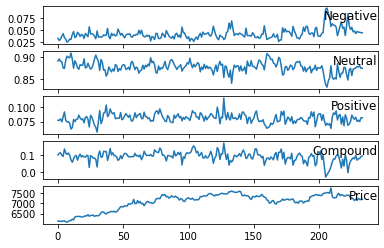

In [ ]:
values = df1.values
# specify columns to plot
groups = [ 1,2,3,4,5]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df1.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [ ]:
df1.set_index('DateTime',inplace=True)

In [ ]:
cols = df1.columns.tolist()
cols = cols[-1:] + cols[:-1]
df1 = df1[cols]
df1.head()

,Price,Negative,Neutral,Positive,Compound
DateTime,,,,,
2017-10-31 00:00:00,6142.46,0.032437,0.890339,0.077232,0.101499
2017-10-31 01:00:00,6139.47,0.027915,0.895003,0.077087,0.111259
2017-10-31 02:00:00,6128.20,0.030808,0.889559,0.079633,0.113919
2017-10-31 03:00:00,6130.72,0.037267,0.888217,0.074520,0.099411
2017-10-31 04:00:00,6143.92,0.042299,0.874659,0.083050,0.092276


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df1.values)

In [ ]:
n_hours = 3
n_features = 5
n_obs = n_hours*n_features

In [ ]:
reframed = series_to_supervised(scaled, n_hours, 1)
reframed.head()

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
3,0.029552,0.111020,0.766923,0.346891,0.652110,0.027715,0.048150,0.827967,0.344488,0.699593,0.020791,0.088364,0.756713,0.386561,0.712532,0.022339,0.178154,0.739152,0.302084,0.641950
4,0.027715,0.048150,0.827967,0.344488,0.699593,0.020791,0.088364,0.756713,0.386561,0.712532,0.022339,0.178154,0.739152,0.302084,0.641950,0.030449,0.248102,0.561707,0.443027,0.607235
5,0.020791,0.088364,0.756713,0.386561,0.712532,0.022339,0.178154,0.739152,0.302084,0.641950,0.030449,0.248102,0.561707,0.443027,0.607235,0.039567,0.135107,0.549087,0.593141,0.825337
6,0.022339,0.178154,0.739152,0.302084,0.641950,0.030449,0.248102,0.561707,0.443027,0.607235,0.039567,0.135107,0.549087,0.593141,0.825337,0.007090,0.085817,0.793070,0.343725,0.704697
7,0.030449,0.248102,0.561707,0.443027,0.607235,0.039567,0.135107,0.549087,0.593141,0.825337,0.007090,0.085817,0.793070,0.343725,0.704697,0.000000,0.000000,0.910399,0.297578,0.667668


In [ ]:
reframed = reframed.drop(reframed.columns[-4:], axis=1)
reframed.head()

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var5(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t)
3,0.029552,0.111020,0.766923,0.346891,0.652110,0.027715,0.048150,0.827967,0.344488,0.699593,0.020791,0.088364,0.756713,0.386561,0.712532,0.022339
4,0.027715,0.048150,0.827967,0.344488,0.699593,0.020791,0.088364,0.756713,0.386561,0.712532,0.022339,0.178154,0.739152,0.302084,0.641950,0.030449
5,0.020791,0.088364,0.756713,0.386561,0.712532,0.022339,0.178154,0.739152,0.302084,0.641950,0.030449,0.248102,0.561707,0.443027,0.607235,0.039567
6,0.022339,0.178154,0.739152,0.302084,0.641950,0.030449,0.248102,0.561707,0.443027,0.607235,0.039567,0.135107,0.549087,0.593141,0.825337,0.007090
7,0.030449,0.248102,0.561707,0.443027,0.607235,0.039567,0.135107,0.549087,0.593141,0.825337,0.007090,0.085817,0.793070,0.343725,0.704697,0.000000


In [ ]:
values = reframed.values
n_train_hours = 170
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train.shape

(170, 16)

In [ ]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [ ]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(170, 3, 5) (170,) (61, 3, 5) (61,)


In [ ]:
# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history

Epoch 1/20
43/43 - 5s - loss: 0.2188 - val_loss: 0.2583 - 5s/epoch - 116ms/step
Epoch 2/20
43/43 - 0s - loss: 0.0756 - val_loss: 0.1725 - 133ms/epoch - 3ms/step
Epoch 3/20
43/43 - 0s - loss: 0.0656 - val_loss: 0.1715 - 130ms/epoch - 3ms/step
Epoch 4/20
43/43 - 0s - loss: 0.0640 - val_loss: 0.1634 - 144ms/epoch - 3ms/step
Epoch 5/20
43/43 - 0s - loss: 0.0619 - val_loss: 0.1575 - 133ms/epoch - 3ms/step
Epoch 6/20
43/43 - 0s - loss: 0.0603 - val_loss: 0.1465 - 135ms/epoch - 3ms/step
Epoch 7/20
43/43 - 0s - loss: 0.0578 - val_loss: 0.1389 - 142ms/epoch - 3ms/step
Epoch 8/20
43/43 - 0s - loss: 0.0560 - val_loss: 0.1287 - 183ms/epoch - 4ms/step
Epoch 9/20
43/43 - 0s - loss: 0.0535 - val_loss: 0.1233 - 139ms/epoch - 3ms/step
Epoch 10/20
43/43 - 0s - loss: 0.0517 - val_loss: 0.1158 - 140ms/epoch - 3ms/step
Epoch 11/20
43/43 - 0s - loss: 0.0499 - val_loss: 0.1072 - 140ms/epoch - 3ms/step
Epoch 12/20
43/43 - 0s - loss: 0.0478 - val_loss: 0.0996 - 148ms/epoch - 3ms/step
Epoch 13/20
43/43 - 0s - l

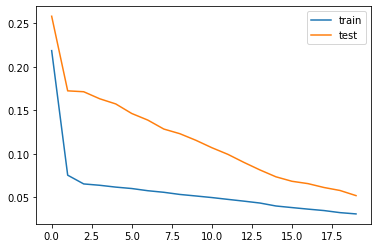

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

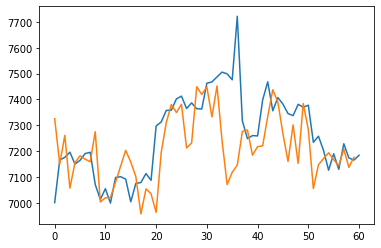

In [ ]:
plt.plot(inv_y)
plt.plot(inv_yhat)
plt.show()

In [ ]:
print(len(inv_y[:len(inv_y)-1]))
print(len(inv_yhat))

60
60


In [ ]:
df_sol = pd.DataFrame({'forecast':inv_yhat,'actual':inv_y[:len(inv_y)-1]})
df_sol.to_csv('Predictions_nosent.csv')

##Linear Regression

In [ ]:
from pyspark.ml.linalg import Vectors
reg_DF =sql.createDataFrame(reframed)
ad_df = reg_DF.rdd.map(lambda x: [Vectors.dense(x[1:]), x[0]]).toDF(['features', 'label'])
ad_df.show(5)

+--------------------+--------------------+
|            features|               label|
+--------------------+--------------------+
|[0.11101980422605...|0.029552352514714997|
|[0.04815012366627...|0.027715314385421852|
|[0.08836430329664...|0.020791093744240374|
|[0.17815407866176...| 0.02233936668264125|
|[0.24810192777598...| 0.03044936778855023|
+--------------------+--------------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol = 'label')

In [ ]:
lr_model = lr.fit(ad_df)

In [ ]:
predictions = lr_model.transform(ad_df)
someDF = predictions.select("prediction", "label").show(5)

+--------------------+--------------------+
|          prediction|               label|
+--------------------+--------------------+
|0.014869183566020183|0.029552352514714997|
|0.013010576301347498|0.027715314385421852|
|0.019219419037099783|0.020791093744240374|
|0.025799090484170506| 0.02233936668264125|
|0.040377823004803304| 0.03044936778855023|
+--------------------+--------------------+
only showing top 5 rows



In [ ]:
predictions = predictions.toPandas()

In [ ]:
len(predictions)

231

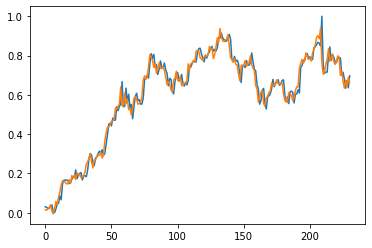

In [ ]:
plt.plot(predictions['label'])
plt.plot(predictions['prediction'])
plt.show()

In [ ]:
print("Coefficients: %s" % str(lr_model.coefficients))
print("Intercept: %s" % str(lr_model.intercept))

Coefficients: [-0.9796481730917139,-1.0875905672715136,-0.9549385242221614,0.06427278131415748,0.8146744153927732,-28.673434221580802,-30.634058821408306,-24.306164269913122,0.15126314783799294,0.08981430010886757,2.4837074643184613,2.7801628871707127,2.2308557289088933,-0.10628479644688911,0.10036344114981315]
Intercept: 33.122478343554405
